In [1]:
import numpy as np

In [2]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving suicides.csv to suicides.csv
User uploaded file "suicides.csv" with length 1570773 bytes


In [4]:
# 0. load data in DataFrame
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
df.head()

,country,year,sex,age,suicides/100k pop,HDI for year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,6.71,NaN,796,Generation X
1,Albania,1987,male,35-54 years,5.19,NaN,796,Silent
2,Albania,1987,female,15-24 years,4.83,NaN,796,Generation X
3,Albania,1987,male,75+ years,4.59,NaN,796,G.I. Generation
4,Albania,1987,male,25-34 years,3.28,NaN,796,Boomers


In [5]:
spain = df[df["country"]=="Spain"]

spain_group = spain.groupby(["year", "sex"]).agg(
    {
        'suicides/100k pop':'mean', 
    }
).reset_index()

mask = spain_group["sex"] == "male"
spain_male = spain_group[mask]
spain_female = spain_group[~mask]

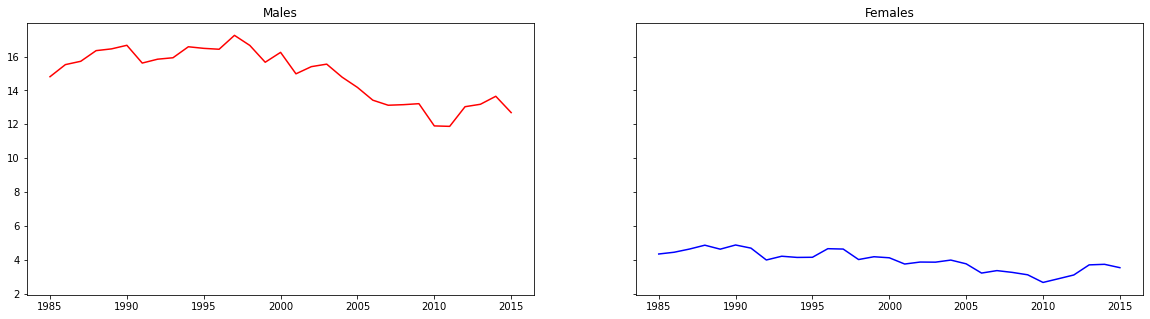

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True,  figsize = (20,5))

axs[0].set_title('Males')
axs[1].set_title('Females')

axs[0].plot(spain_male["year"], spain_male["suicides/100k pop"], color="red")
axs[1].plot(spain_female["year"], spain_female["suicides/100k pop"], color="blue")

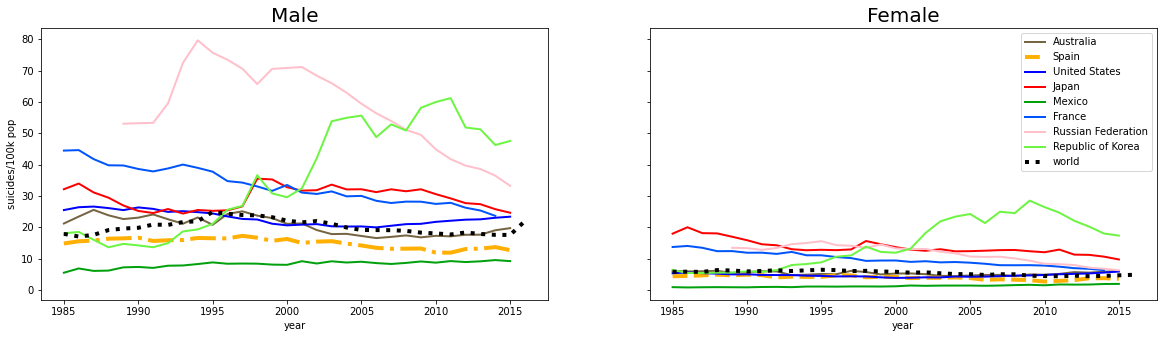

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,  figsize = (20,5))

fav_countries = ["Australia", "Spain", "United States", "Japan", "Mexico", "France", "Russian Federation", "Republic of Korea"]
colors = ["#756542", "#ffb003", "blue", "#fc0000", "#00a10d", "#0054fc", "pink", "#6cf542"]
# for country in df["country"].drop_duplicates().tolist():
for i, country in enumerate(fav_countries):
    df_country = df[df["country"]==country]

    country_group = df_country.groupby(["year", "sex"]).agg(
        {
            'suicides/100k pop':'mean', 
        }
    ).reset_index()

    mask = country_group["sex"] == "male"
    country_male = country_group[mask]
    country_female = country_group[~mask]

    if country == "Spain":
        sns.lineplot(ax=axes[0], x=country_male["year"], y=country_male["suicides/100k pop"], linewidth=4, linestyle='-.', color=colors[i])
        sns.lineplot(ax=axes[1], x=country_female["year"], y=country_female["suicides/100k pop"], linewidth=4, linestyle='--', color=colors[i])
    else:
        sns.lineplot(ax=axes[0], x=country_male["year"], y=country_male["suicides/100k pop"], linewidth=2, color=colors[i])
        sns.lineplot(ax=axes[1], x=country_female["year"], y=country_female["suicides/100k pop"], linewidth=2, color=colors[i])

world_group = df.groupby(["year", "sex"]).agg(
    {
        'suicides/100k pop':'mean', 
    }
).reset_index()
mask = world_group["sex"] == "male"
world_male = world_group[mask].reset_index()
world_female = world_group[~mask].reset_index()

ax = sns.lineplot(ax=axes[0], x=world_male["year"], y=world_male["suicides/100k pop"], linestyle=':', linewidth=4, color="k")
ax.set_title("Male", color="k", fontweight=10, fontsize=20)

ax = sns.lineplot(ax=axes[1], x=world_female["year"], y=world_female["suicides/100k pop"], linestyle=':', linewidth=4, color="k")
ax.set_title("Female", color="k", fontweight=10, fontsize=20)
# ax.tick_params(axis='y', labelleft=True)

plt.legend(fav_countries + ["world"])

Text(0, 0.5, 'Factor suicides/100k pop [Male/Female]')

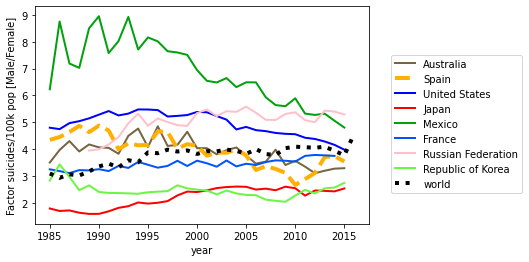

In [13]:
import seaborn as sns

# fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,  figsize = (20,5))

plt.plot()
fav_countries = ["Australia", "Spain", "United States", "Japan", "Mexico", "France", "Russian Federation", "Republic of Korea"]
colors = ["#756542", "#ffb003", "blue", "#fc0000", "#00a10d", "#0054fc", "pink", "#6cf542"]
# for country in df["country"].drop_duplicates().tolist():
for i, country in enumerate(fav_countries):
    df_country = df[df["country"]==country]
    country_group = df_country.groupby(["year", "sex"]).agg(
        {
            'suicides/100k pop':'mean', 
        }
    ).reset_index()
    mask = country_group["sex"] == "male"
    country_male = country_group[mask].reset_index()
    country_female = country_group[~mask].reset_index()

    if country == "Spain":
        sns.lineplot(x=country_female["year"], y=country_female["suicides/100k pop"], linewidth=4, linestyle='--', color=colors[i])
    else:
        sns.lineplot(x=country_male["year"], y=country_male["suicides/100k pop"]/country_female["suicides/100k pop"], linewidth=2, color=colors[i])


world_group = df.groupby(["year", "sex"]).agg(
    {
        'suicides/100k pop':'mean', 
    }
).reset_index()
mask = world_group["sex"] == "male"
world_male = world_group[mask].reset_index()
world_female = world_group[~mask].reset_index()
sns.lineplot(x=world_male["year"], y=world_male["suicides/100k pop"]/world_female["suicides/100k pop"], linestyle=':', linewidth=4, color="k")

plt.legend(fav_countries + ["world"], bbox_to_anchor = (1.05, 0.8))
plt.ylabel('Factor suicides/100k pop [Male/Female]')

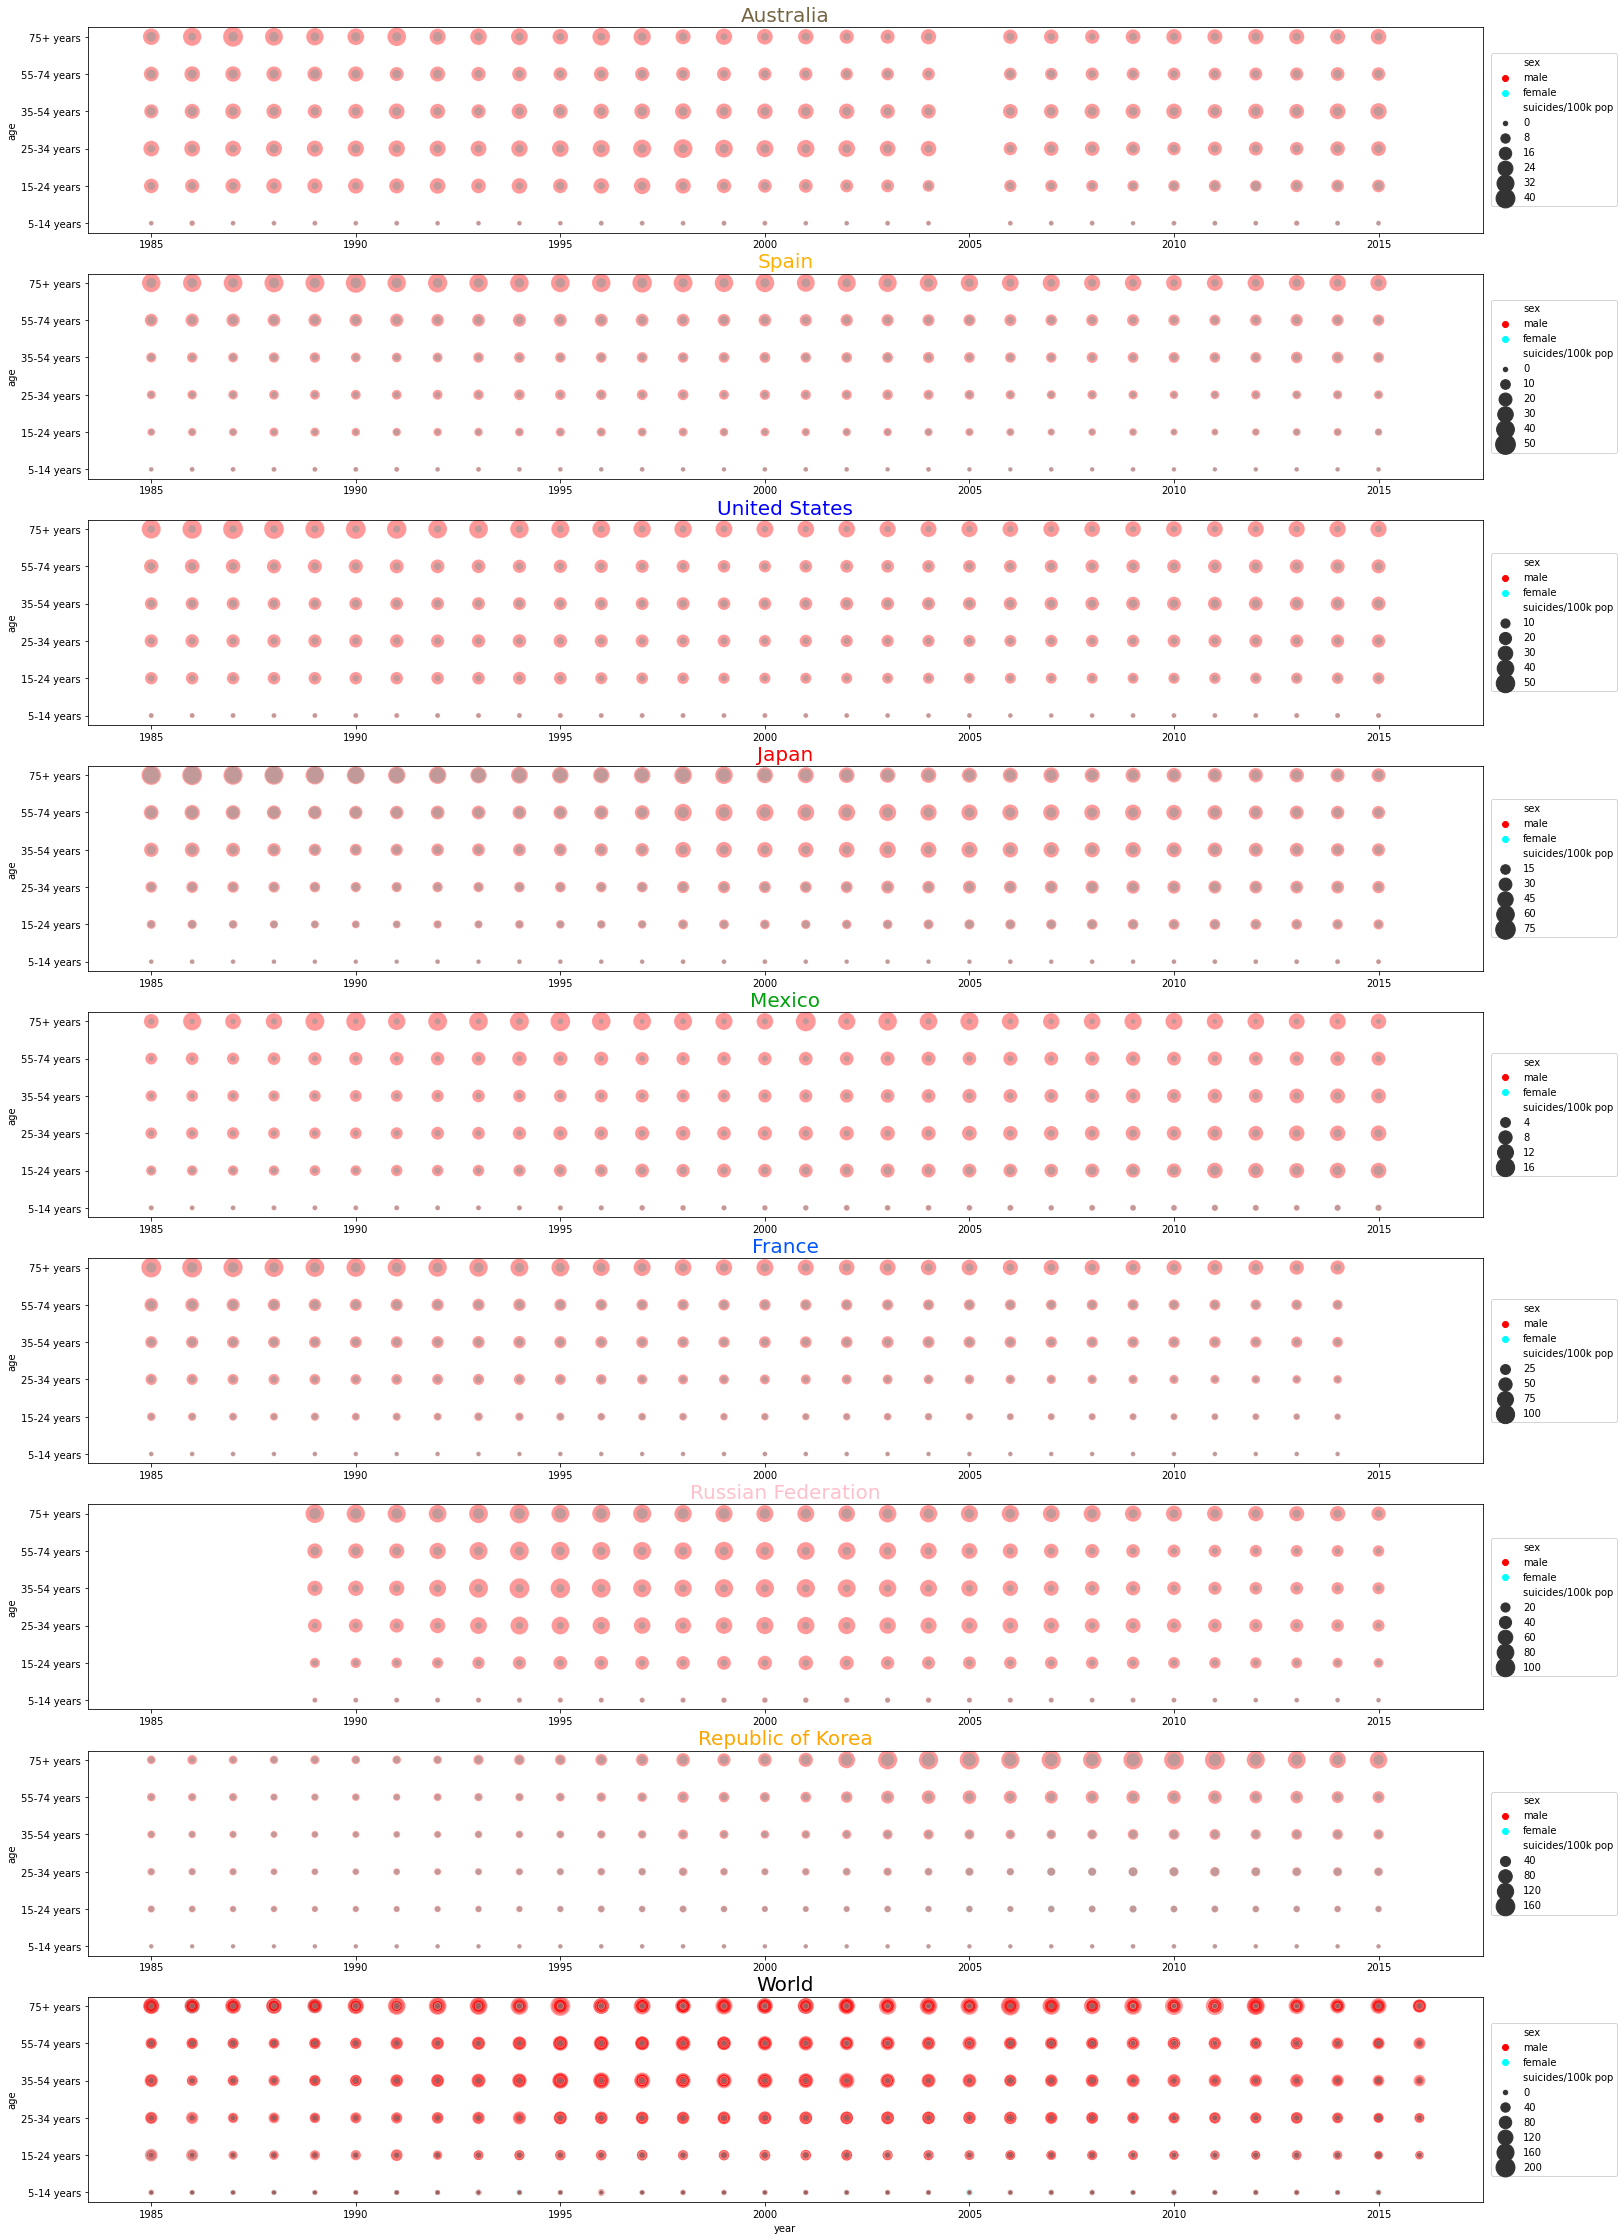

In [12]:
ages_graph = df.groupby(["country", "year", "age", "sex"]).\
                        agg({"suicides/100k pop":'mean'}).reset_index()
group_ages = ["5-14 years","15-24 years", "25-34 years", "35-54 years", 
              "55-74 years", "75+ years"]
ages_graph['age'] = pd.Categorical(ages_graph['age'],ordered=True,
                                    categories=reversed(group_ages))

colors = ["#756542", "#ffb003", "blue", "#fc0000", "#00a10d", "#0054fc", "pink", "orange"]

fig, axes = plt.subplots(9,1, figsize=(25,40), sharex=True, sharey=True)

ax = sns.scatterplot(data=ages_graph, x="year", y="age", size="suicides/100k pop", 
                hue="sex", alpha=0.4, sizes=(20, 400), palette=['red','cyan'], 
                hue_order=["male", "female"])
ax.tick_params(axis='x', labelbottom=True)
ax.set_title("World", color="k", fontweight=10, fontsize=20)
ax.legend(loc="center right", bbox_to_anchor = (1.1, 0.5))

for country, ax, i in zip (fav_countries, axes.flatten(), range(len(fav_countries))):
    sns.scatterplot(ax=ax, data=ages_graph[ages_graph["country"]==country], x="year", y="age", size="suicides/100k pop", 
                hue="sex", alpha=0.4, sizes=(20, 400), palette=['red','cyan'], 
                hue_order=["male", "female"])
    ax.set_title(country, color=colors[i], fontweight=10, fontsize=20)
    ax.tick_params(axis='x', labelbottom=True)
    # ax.legend(bbox_to_anchor = (1.00, 0.5), prop={"size":20})
    ax.legend(loc="center right", bbox_to_anchor = (1.1, 0.5))

lines, labels = fig.axes[-1].get_legend_handles_labels()
    